In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv('medical_examination.csv', index_col = 0)

df['height'] = df['height']/100
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0
1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1
2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1
3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1
4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0


 # Add 'overweight' column

In [3]:
# to compute BMI weight(Kg) /height² (meters) 

overweight = df['weight']/(df['height']*df['height'])
overweight

id
0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
99993    26.927438
99995    50.472681
99996    31.353579
99998    27.099251
99999    24.913495
Length: 70000, dtype: float64

In [4]:
overweight[overweight <= 25] = 0
overweight[overweight >25]= 1
overweight = overweight.astype('int32')

In [5]:
df['overweight'] = overweight

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [6]:
def normalize_data(property,df):
    data = df.copy()
    to_norm = data.loc[: , [property]]
    to_norm[to_norm ==1] = 0
    to_norm[to_norm >1] =1
    to_norm = to_norm.astype('int32')
    return to_norm

In [7]:
df['gluc']= normalize_data('gluc',df)
df['cholesterol'] = normalize_data('cholesterol',df)

In [8]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0


# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

In [9]:
df_cat = pd.melt(df, id_vars = ['cardio'],value_vars =['active', 'alco','cholesterol' ,'gluc','overweight','smoke'])

In [10]:
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


  # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

In [11]:
df_cat['total'] =  pd.Series(np.ones(df_cat.shape[0]))
df_cat

,cardio,variable,value,total
0,0,active,1,1.0
1,1,active,1,1.0
2,1,active,0,1.0
3,1,active,1,1.0
4,0,active,0,1.0
...,...,...,...,...
419995,0,smoke,1,1.0
419996,1,smoke,0,1.0
419997,1,smoke,0,1.0
419998,1,smoke,0,1.0


In [12]:
df_cat_2 = df_cat.groupby(by = ['cardio','value', 'variable']).count()
         
df_cat = df_cat_2.copy()
df_cat = df_cat.reset_index()

# Draw the catplot with 'sns.catplot()'

In [13]:
#fig , ax = plt.subplots()

#plt.xlabel('variable')
#plt.ylabel('total')
#fig = sns.catplot(data= df_cat , x = 'variable', y = 'total' , hue = 'value', col = 'cardio', kind = 'bar').fig

#fig

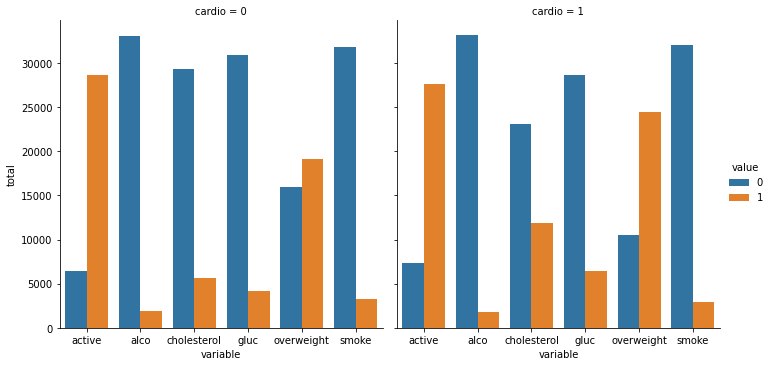

In [14]:
sns.catplot(data= df_cat , x = 'variable', y = 'total' , hue = 'value', col = 'cardio', kind = 'bar')

# Clean the data

In [42]:
df_heat = df.reset_index()

df_heat.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0


In [43]:
mask_1 = df_heat['ap_lo']<= df_heat['ap_hi']

In [44]:
mask_2 =df_heat['height'] >= df_heat['height'].quantile(0.025)

In [45]:
mask_3 = df_heat['height']<= df_heat['height'].quantile(0.975)

In [46]:
mask_4 = df_heat['weight']>= df_heat['weight'].quantile(0.025)

In [47]:
mask_5  = df_heat['weight']<= df_heat['weight'].quantile(0.975)

In [48]:
df_heat = df_heat[ mask_1 & mask_2 & mask_3 & mask_4 & mask_5] 

In [49]:
df_heat.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0


# Calculate the correlation matrix

In [50]:
corr= df_heat.corr()

In [51]:
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [52]:
corr.shape

(14, 14)

# Generate a mask for the upper triangle

In [53]:
mask = np.triu(np.ones(corr.shape)).astype(bool)

In [54]:
mask.shape

(14, 14)

In [55]:
#corr = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))

In [56]:
#corr  = corr.stack()

In [57]:
#corr

# Set up the matplotlib figure

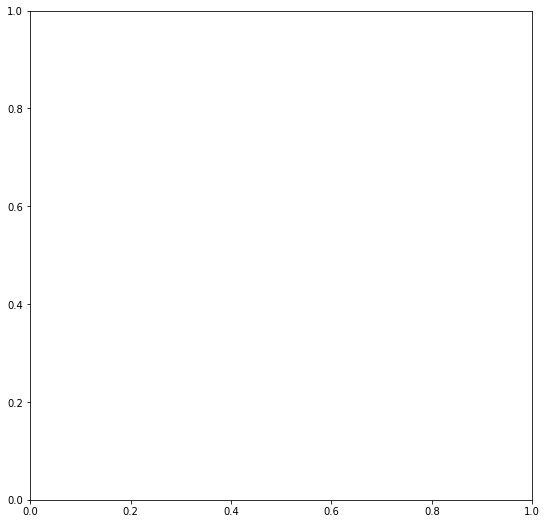

In [60]:
fig ,ax  = plt.subplots(figsize=(9,9))


# Draw the heatmap with 'sns.heatmap()'

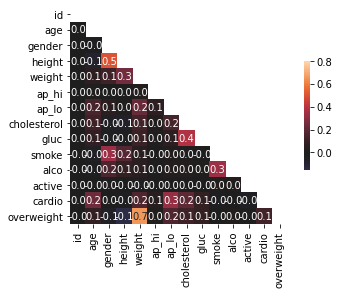

In [63]:
fig = sns.heatmap(corr, annot = True ,mask =  mask, fmt = '.1f', vmax= 0.8, center = 0, square = True, cbar_kws = {'shrink':0.5})